In [3]:
! pip install shap
import numpy as np
import pandas as pd
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
import shap
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore", category=FutureWarning)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.3 MB/s eta 0:00:00


In [2]:
df = pd.read_csv(r"/data_set.csv")

print("Number of df samples are",df.shape)

categorical_features = ['State_Factor', 'building_class', 'facility_type']
numerical_features=df.select_dtypes('number').columns


NameError: ignored

In [ ]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


Text(0.5, 1.0, 'Missing values in  Data')

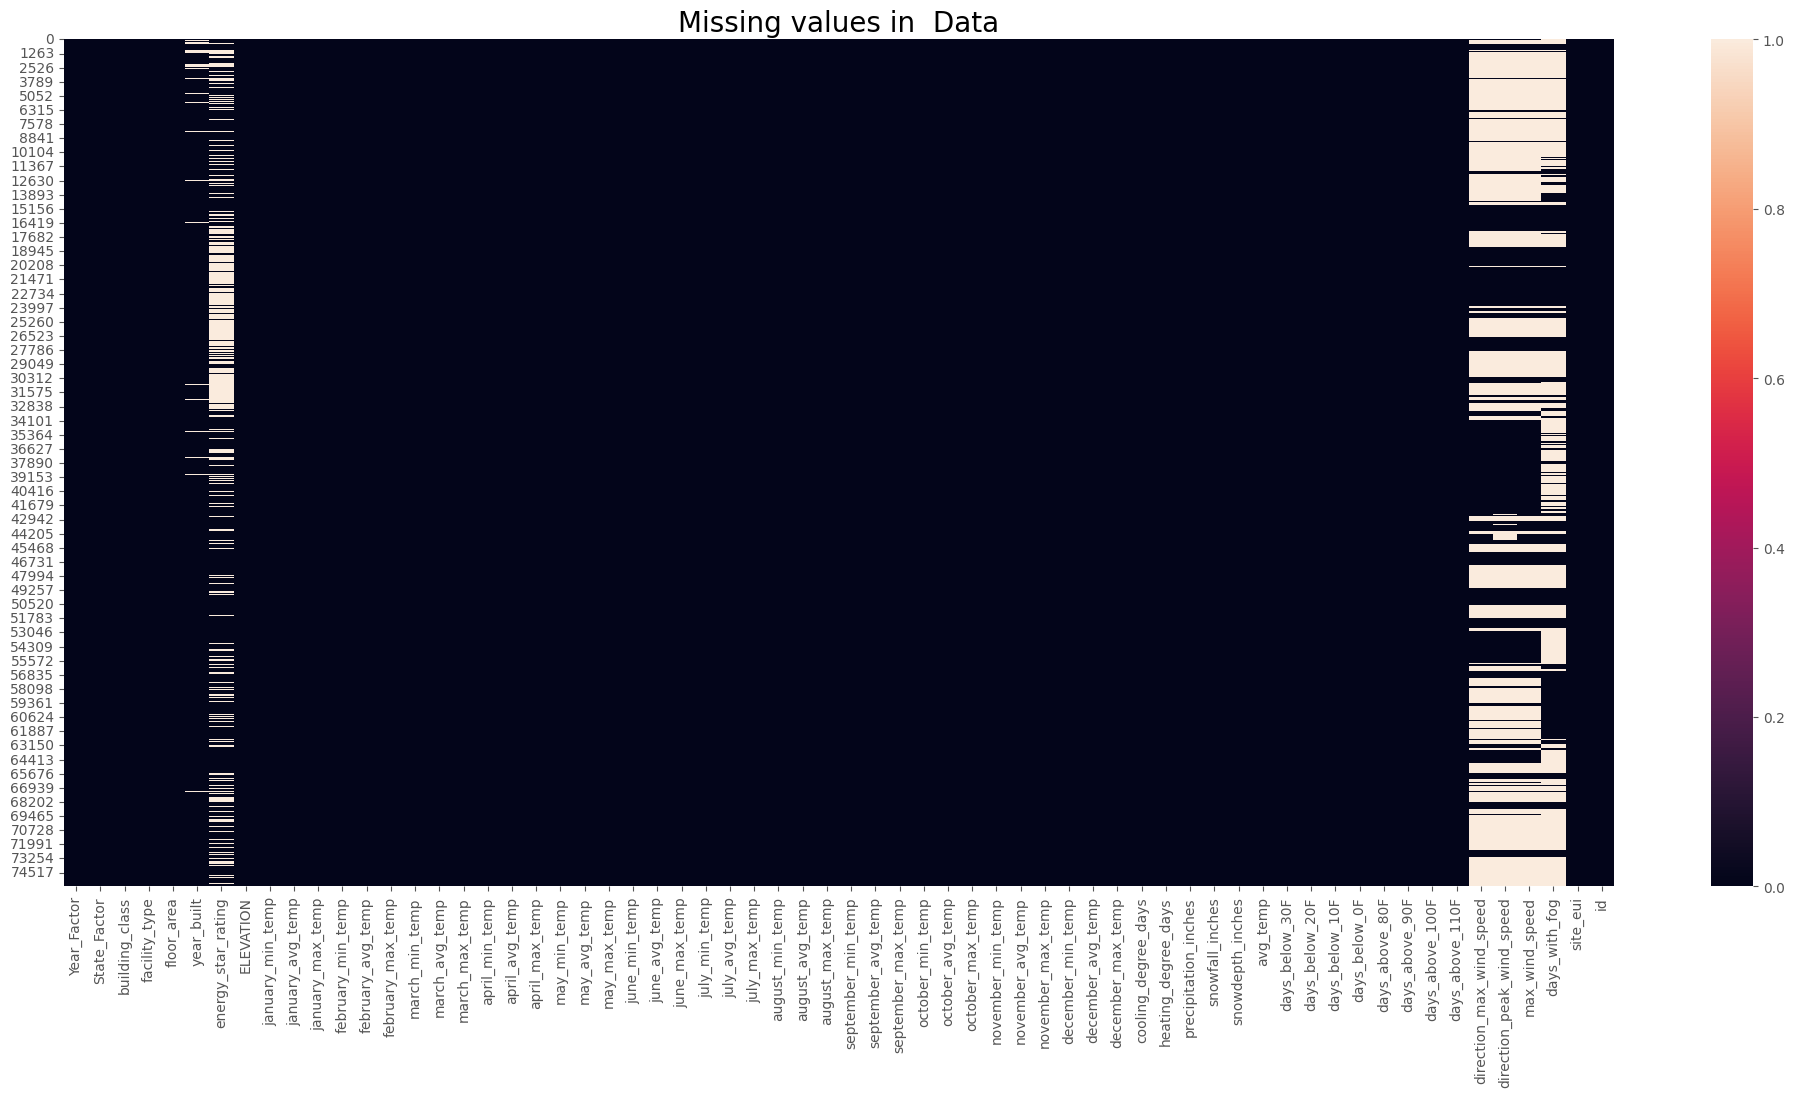

In [ ]:
plt.figure(figsize = (25,11))
sns.heatmap(df.isna().values, xticklabels=df.columns)
plt.title("Missing values in  Data", size=20)

In [ ]:
missing_columns = [col for col in df.columns if df[col].isnull().any()]
missingvalues_count =df.isna().sum()
missingValues_df = pd.DataFrame(missingvalues_count.rename('Null Values Count')).loc[missingvalues_count.ne(0)]
missingValues_df.style.background_gradient(cmap="Pastel1")

df['year_built'] =df['year_built'].replace(np.nan, 2022)
null_col=['energy_star_rating','direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog']
imputer = SimpleImputer()
imputer.fit(df[null_col])
data_transformed = imputer.transform(df[null_col])
df[null_col] = pd.DataFrame(data_transformed)

Text(0.5, 1.0, 'Missing values in training Data')

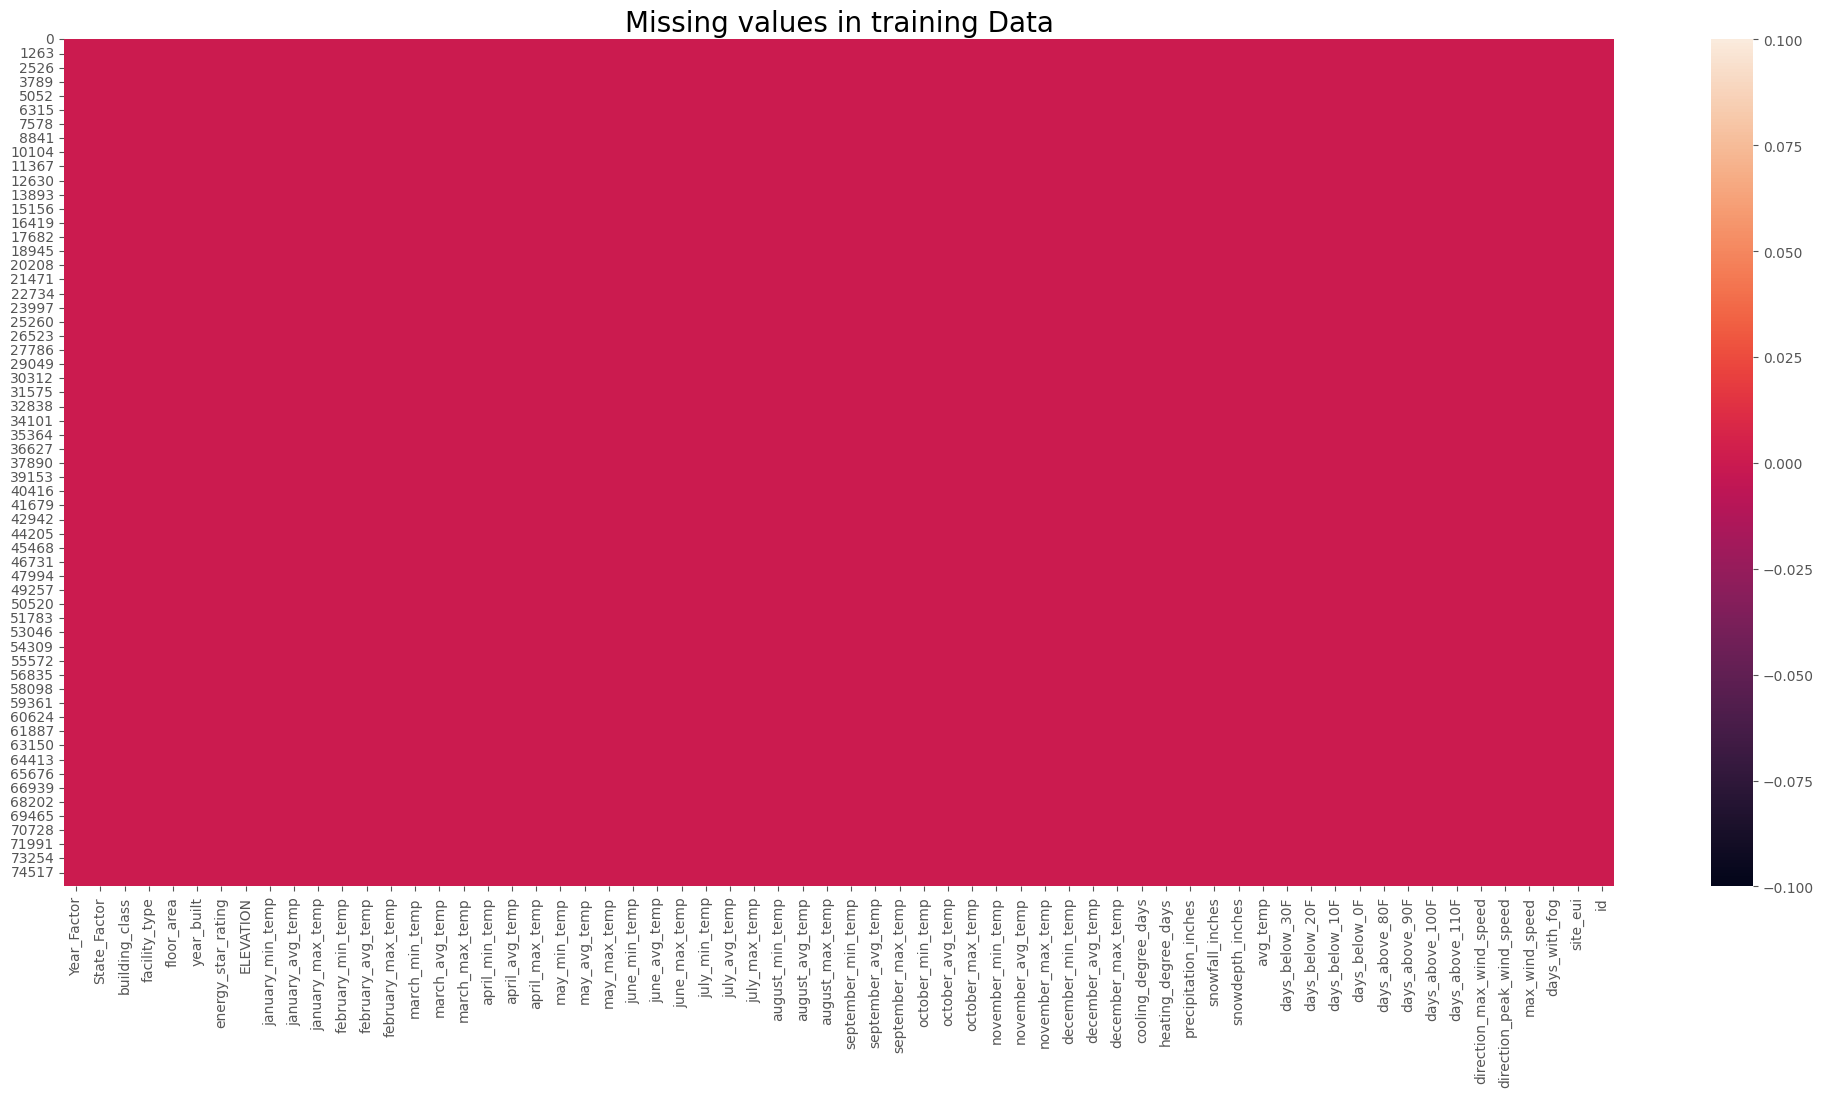

In [ ]:
plt.figure(figsize = (25,11))
sns.heatmap(df.isna().values, xticklabels=df.columns)
plt.title("Missing values in training Data", size=20)

In [ ]:
le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615,0
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150,1
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619,2
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926,3
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395,4


In [ ]:
df.describe().style.background_gradient()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,4.367755,4.237998,0.574970,25.931914,165983.865858,1953.996726,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,1.549536,0.494351,11.645404,246875.790940,38.139247,23.063738,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,88.726751,87.226977,4.369629,31.883663,58.255403,21869.306509
min,1.000000,0.000000,0.000000,0.000000,943.000000,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,4.000000,0.000000,27.000000,62379.000000,1927.000000,56.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000

In [ ]:
import copy
y = df["site_eui"]
train = df.drop(["site_eui","id"],axis =1)
trainnames = copy.deepcopy(train)
scaler = StandardScaler()
train = scaler.fit_transform(train)


In [ ]:
train

array([[-2.28876040e+00, -2.73502847e+00, -1.16308853e+00, ...,
         4.45712541e-16,  2.85122086e+00, -1.73202794e+00],
       [-2.28876040e+00, -2.73502847e+00, -1.16308853e+00, ...,
        -3.04678581e+00, -9.62741832e-01, -1.73198222e+00],
       [-2.28876040e+00, -2.73502847e+00, -1.16308853e+00, ...,
        -3.04678581e+00, -9.93752559e-01, -1.73193649e+00],
       ...,
       [ 1.10929044e+00, -1.44431120e+00, -1.16308853e+00, ...,
         4.45712541e-16, -5.86735632e-01,  1.73193649e+00],
       [ 1.10929044e+00, -1.44431120e+00, -1.16308853e+00, ...,
         4.45712541e-16,  8.74496436e+00,  1.73198222e+00],
       [ 1.10929044e+00, -1.44431120e+00,  8.59779779e-01, ...,
         4.45712541e-16, -9.17174346e-01,  1.73202794e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 50)


In [ ]:
X_test_ft=pd.DataFrame(X_test,columns=trainnames.columns)
X_test_ft.shape()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
0,1.10929,0.491765,-1.163089,-1.711580,-0.322042,0.340944,1.255286,-0.595262,-0.046087,0.020175,...,-0.408211,0.042580,0.525662,0.268761,-0.124112,-0.017181,-0.738820,-7.082715e-01,-7.301815e-01,4.457125e-16
1,1.10929,0.491765,0.859780,0.091718,-0.374352,1.363520,0.214685,-0.595262,-0.046087,0.020175,...,-0.408211,0.042580,0.525662,0.268761,-0.124112,-0.017181,-0.738820,-7.082715e-01,-7.301815e-01,4.457125e-16
2,1.10929,0.491765,0.859780,0.091718,-0.438049,-0.340773,-2.126669,-0.249048,-0.046087,0.020175,...,-0.408211,0.042580,0.525662,0.268761,-0.124112,-0.017181,0.000000,-8.145960e-17,4.065262e-16,4.457125e-16
3,0.42968,-0.153594,-1.163089,-1.110481,-0.449459,0.760462,-0.132183,2.675632,-2.178064,-1.987867,...,4.258623,6.952893,-0.502707,-0.919113,-0.124112,-0.017181,2.969218,3.178166e+00,3.023022e+00,2.096948e+00
4,0.42968,-0.798953,0.859780,0.091718,0.542852,-0.366993,0.821702,0.077382,-0.365884,-0.620892,...,1.288820,-0.302936,1.198058,0.725635,-0.124112,-0.017181,0.000000,-8.145960e-17,4.065262e-16,4.457125e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15147,0.42968,-1.444311,-1.163089,-2.055066,-0.565405,0.419604,0.000000,-0.349615,1.766093,1.587877,...,-0.691050,-0.302936,-1.689287,-1.101863,-0.124112,-0.017181,0.000000,-8.145960e-17,4.065262e-16,4.457125e-16
15148,-0.24993,-0.798953,-1.163089,-1.711580,-0.323500,-0.734071,-1.302859,-0.601856,-0.898878,-0.860505,...,1.005981,-0.302936,0.407004,0.268761,-0.124112,-0.017181,0.000000,-8.145960e-17,4.065262e-16,4.457125e-16
15149,-0.24993,0.491765,0.859780,0.091718,-0.182100,-1.415788,-2.213385,0.052652,-0.792279,-0.816701,...,0.298885,-0.302936,-0.304943,-0.919113,-0.124112,-0.017181,-0.738820,-7.082715e-01,-7.301815e-01,4.457125e-16
15150,-1.60915,0.491765,0.859780,0.091718,-0.402974,-0.629191,0.000000,0.052652,0.167110,0.430544,...,-0.691050,-0.302936,-0.423601,0.268761,-0.124112,-0.017181,-0.738820,-7.082715e-01,-7.301815e-01,-3.180976e-01


In [ ]:
import xgboost
xgboost_model = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.02, gamma=0, subsample=0.75,
                           colsample_bytree=0.4, max_depth=5)
xgboost_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgboost_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = trainnames.columns.tolist(), top=63)

Weight,Feature
0.2749 ± 0.0067,energy_star_rating
0.1905 ± 0.0058,facility_type
0.0829 ± 0.0026,floor_area
0.0358 ± 0.0053,building_class
0.0231 ± 0.0016,State_Factor
0.0132 ± 0.0016,year_built
0.0065 ± 0.0007,january_avg_temp
0.0035 ± 0.0005,ELEVATION
0.0031 ± 0.0006,january_min_temp
0.0024 ± 0.0007,february_avg_temp


In [ ]:
explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_test_ft)

[12:50:59] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[12:51:01] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


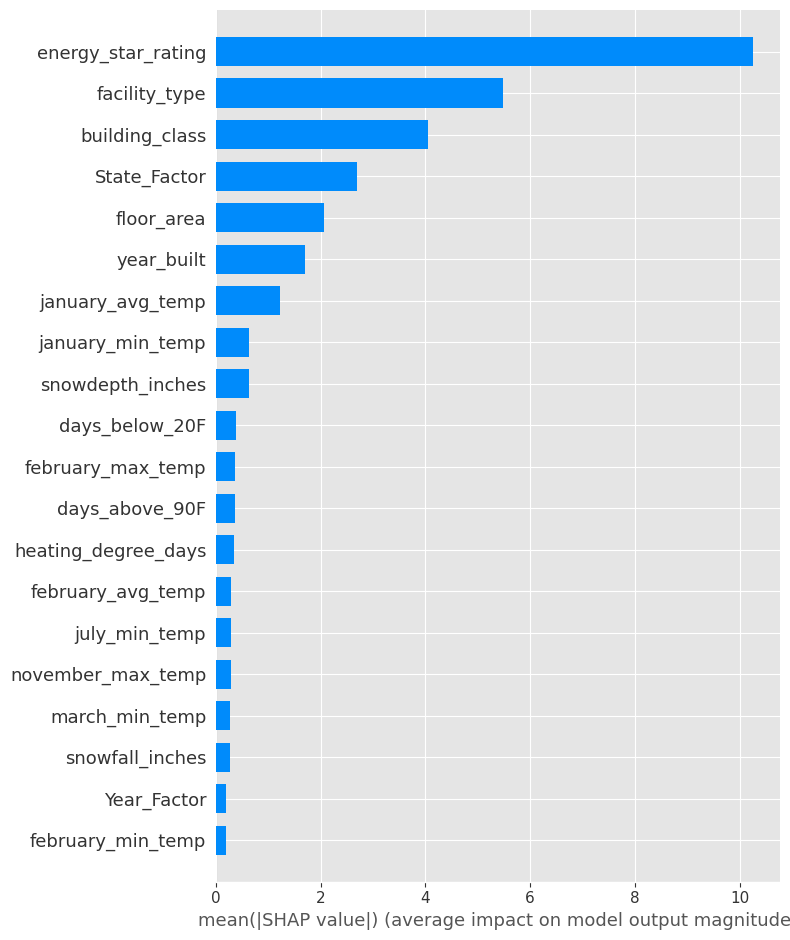

In [ ]:
#Variable Importance Plot
shap.summary_plot(shap_values, X_test_ft,plot_type="bar")

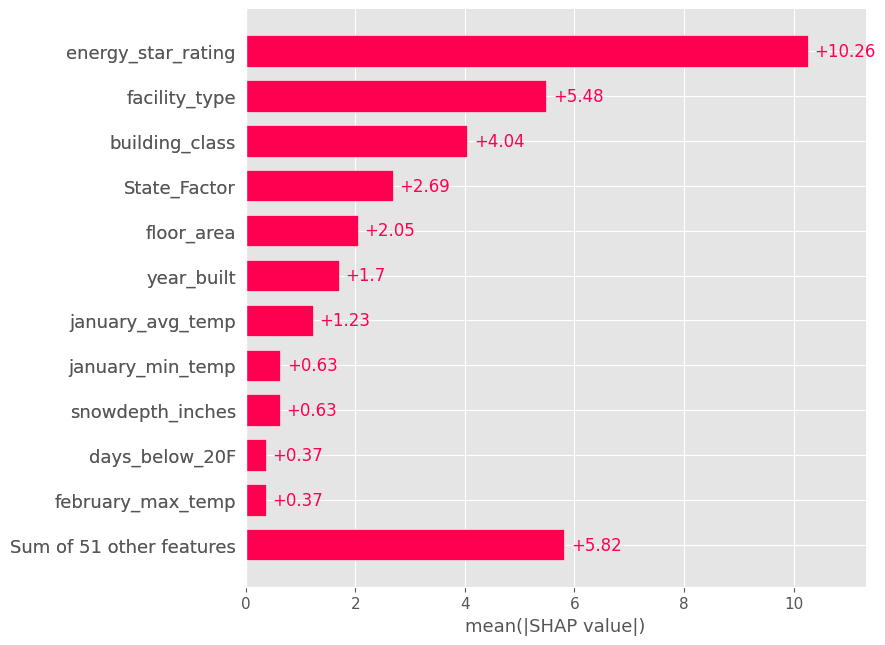

In [ ]:
shap.plots.bar(shap_values,max_display=12)

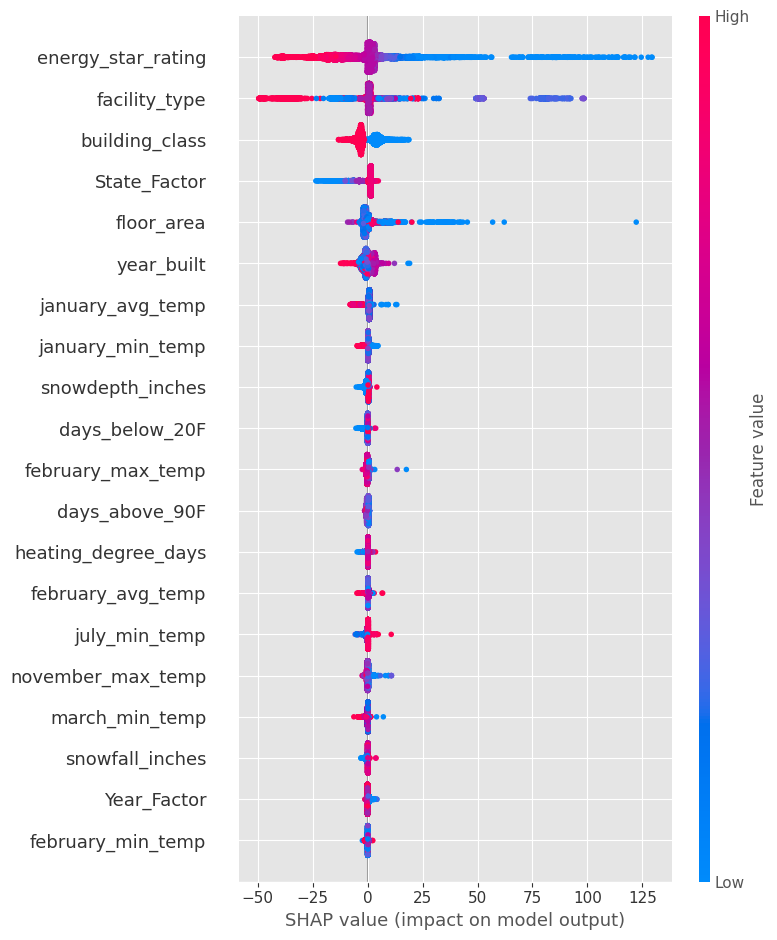

In [ ]:
shap.summary_plot(shap_values, X_test_ft)

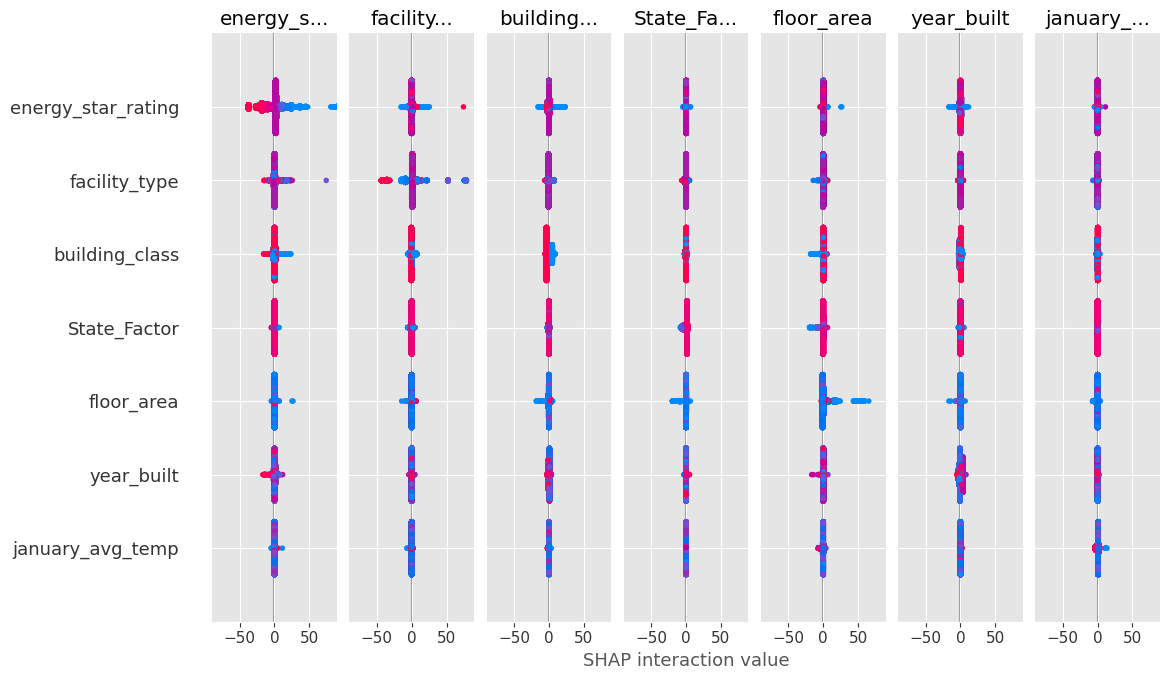

In [ ]:
shap_interaction_values = explainer.shap_interaction_values(X_test_ft)
shap.summary_plot(shap_interaction_values, X_test_ft)

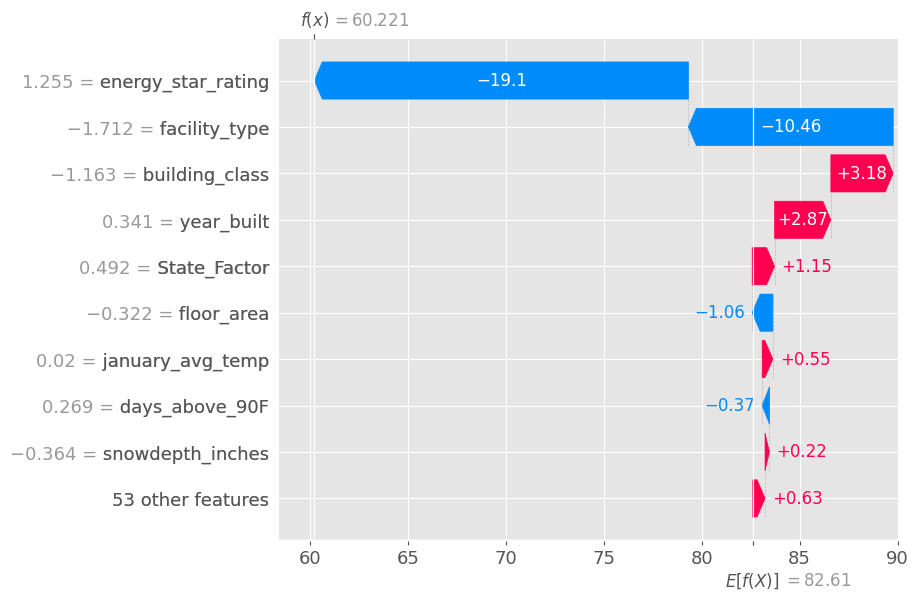

In [ ]:
shap.plots.waterfall(shap_values[0])

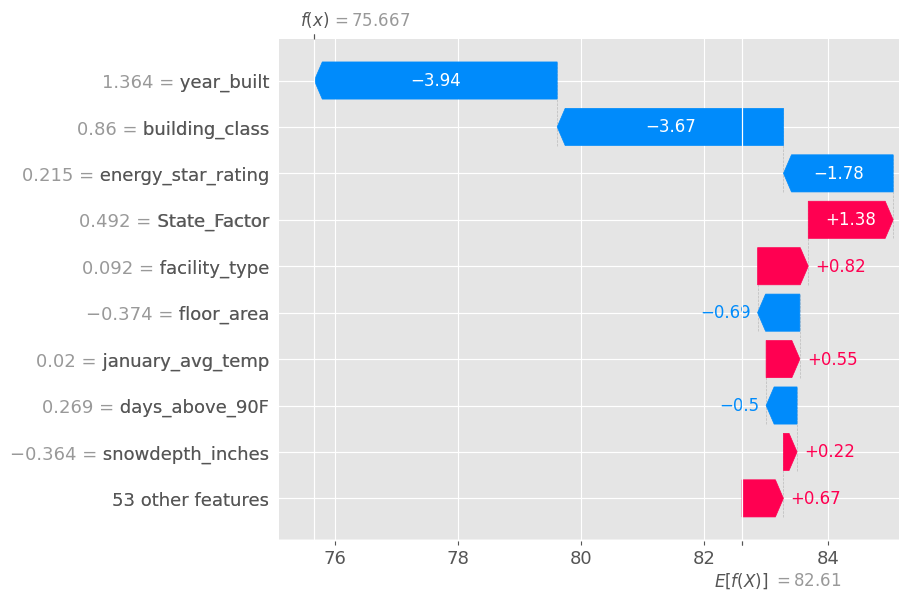

In [ ]:
shap.plots.waterfall(shap_values[1])

In [ ]:
explainer = shap.TreeExplainer(xgboost_model)
shap_values = explainer.shap_values(X_test_ft)
shap.initjs()
def p(j):
    return(shap.force_plot(explainer.expected_value, shap_values[j,:], X_test_ft.iloc[j,:]))
p(0)

In [ ]:
p(1)

NameError: ignored

In [ ]:
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X_test_ft)[0]
shap.decision_plot(expected_value, shap_values, X_test_ft)

In [ ]:
shap_values = explainer.shap_values(X_test_ft)[1]
shap.decision_plot(expected_value, shap_values, X_test_ft)

In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                    feature_names=trainnames.columns,
                    class_names=['site_eui'],
                    categorical_features=categorical_features,
                    verbose=True, mode='regression')

In [ ]:
exp = explainer.explain_instance(X_test_ft.iloc[0],
     xgboost_model.predict, num_features=10)
exp.as_pyplot_figure()